In [257]:
import networkx as nx
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import random
import pickle
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import accuracy_score

In [235]:
train_data = pd.read_csv("task1\\2016-12-1_train.csv")

In [4]:
test_data = pd.read_csv("task1\\2016-12-1_test.csv")
print( test_data.head() )
print( len(test_data))

  Source    Target  value  nb_transactions
0      0      1049    NaN              NaN
1      0  10645127    NaN              NaN
2      0  11706884    NaN              NaN
3      0      1236    NaN              NaN
4      0      1432    NaN              NaN
2000


In [5]:
print( train_data.head() )
print( train_data.tail() )

  Source Target       value  nb_transactions
0      0    101    71987001                7
1      0    102    19231410               18
2      0    107  3825066922               24
3      0   1075     2955400                1
4      0    108   489695841                7
         Source      Target       value  nb_transactions
5152  YoBit.net  HitBtc.com     2052340                1
5153  YoBit.net   Huobi.com   925794918                8
5154  YoBit.net    Luno.com    18002879                2
5155  YoBit.net  OKCoin.com    10536106                1
5156  YoBit.net    Xapo.com  1293376082                9


In [6]:
sources_set = set( train_data['Source'].tolist() )
targets_set = set( train_data['Target'].tolist() )
nb_transactions_set = set( train_data['nb_transactions'].tolist() )
all_wallets = sources_set.union(targets_set)
print(len(all_wallets), len(sources_set), len(targets_set)) 

1917 1316 1166


In [7]:
sources_testset = set( test_data['Source'].tolist() )
targets_testset = set( test_data['Target'].tolist() )
all_testwallets = sources_testset.union(targets_testset)
len(all_testwallets)

1557

In [8]:
counter = 0
new_testwallets = []
for wallet in all_testwallets:
    if wallet in all_wallets:
        counter+=1
    else:
        new_testwallets.append(wallet)

print("there are ", counter, "common wallets between test and train wallets")
print("there are ", len(new_testwallets), "new wallets in the test set not present in the train dataset",
        "\n first 40 are: ", new_testwallets[:40])

there are  1052 common wallets between test and train wallets
there are  505 new wallets in the test set not present in the train dataset 
 first 40 are:  ['50811', '635040', '14120882', '71163182', '74226366', '73414816', '50180', '71160002', '72341676', '72103949', '73908275', '50266', '50422', '52031', '69566077', '51987', '10645127', '71031807', '73702137', '51047', '71163198', '52160', '1711316', '72917618', '1171741', '51754', '71866195', '71319760', '18877257', '3658', '71397492', '51351', '70455434', '52684', '69304157', '49984385', '1153961', '51524', '22183', '69778']


In [9]:
test_edges = []
for index, row in test_data.iterrows():
    test_edges.append((row['Source'], row['Target']))
print(test_data.head())
print(test_edges[:10], len(test_edges))

  Source    Target  value  nb_transactions
0      0      1049    NaN              NaN
1      0  10645127    NaN              NaN
2      0  11706884    NaN              NaN
3      0      1236    NaN              NaN
4      0      1432    NaN              NaN
[('0', '1049'), ('0', '10645127'), ('0', '11706884'), ('0', '1236'), ('0', '1432'), ('0', '1622'), ('0', '1903'), ('0', '1911405'), ('0', '20'), ('0', '220')] 2000


In [98]:
impossible_edges = []
impossible_indexes = []
for index,edge in enumerate(test_edges):
    if (edge[0] in new_testwallets) or (edge[1] in new_testwallets):
        impossible_edges.append(edge)
        impossible_indexes.append(index)
print(impossible_edges[:10], len(impossible_edges))


[('0', '10645127'), ('0', '1911405'), ('0', '24781'), ('0', '25815654'), ('0', '32840200'), ('0', '69304413'), ('0', '69461171'), ('0', '70638277'), ('0', '71289118'), ('0', '71319760')] 551


In [100]:
print(impossible_indexes)
len(impossible_indexes)

[1, 7, 12, 14, 15, 28, 29, 31, 32, 33, 35, 36, 39, 51, 58, 67, 70, 89, 99, 105, 106, 111, 119, 120, 123, 143, 146, 158, 161, 164, 168, 169, 170, 171, 173, 176, 185, 190, 199, 200, 204, 210, 214, 220, 229, 233, 236, 243, 244, 245, 255, 264, 265, 279, 284, 286, 308, 311, 312, 313, 323, 333, 335, 338, 342, 343, 344, 350, 356, 361, 367, 376, 378, 379, 385, 387, 388, 389, 397, 399, 410, 412, 422, 427, 431, 433, 440, 441, 442, 451, 452, 461, 462, 464, 465, 467, 468, 478, 480, 481, 483, 492, 499, 501, 514, 520, 523, 527, 530, 531, 536, 545, 546, 547, 548, 549, 554, 560, 576, 578, 579, 580, 582, 583, 592, 603, 604, 610, 645, 646, 648, 652, 653, 655, 656, 658, 663, 665, 667, 668, 670, 678, 679, 686, 693, 694, 699, 703, 738, 747, 748, 749, 750, 751, 752, 753, 754, 755, 757, 759, 761, 763, 764, 765, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 779, 780, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 

551

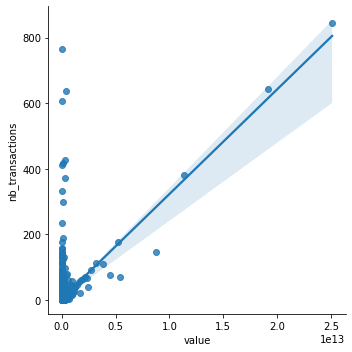

In [17]:
sns.lmplot(x="value", y="nb_transactions", data=train_data)

In [24]:
stats.pearsonr(train_data['value'], train_data['nb_transactions'])

PearsonRResult(statistic=0.5689962283666206, pvalue=0.0)

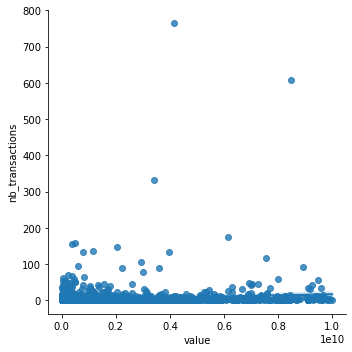

In [104]:
df = train_data[train_data.value <= 1e10]
sns.lmplot(x="value", y="nb_transactions", data=df)

PearsonRResult(statistic=0.9814282315560738, pvalue=1.011105694732531e-18)

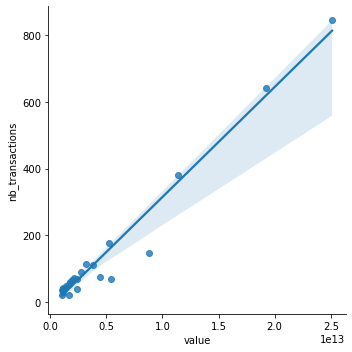

In [109]:
bdf = train_data[train_data.value >= 1e12]
sns.lmplot(x="value", y="nb_transactions", data=bdf)
stats.pearsonr(bdf['value'], bdf['nb_transactions'])

In [110]:
len(bdf. index)

26

In [105]:
stats.pearsonr(df['value'], df['nb_transactions'])

PearsonRResult(statistic=0.14310914846702555, pvalue=4.1032649231094994e-22)

In [93]:
G_train=nx.from_pandas_edgelist(train_data, 'Source', 'Target',  ["value", "nb_transactions"],
                                create_using=nx.DiGraph())
list(G_train.edges)[:5]

[('0', '101'), ('0', '102'), ('0', '107'), ('0', '1075'), ('0', '108')]

In [97]:
G_train['0']['101']

{'value': 71987001, 'nb_transactions': 7}

In [96]:
train_data.loc[( train_data['Source'] == '0' ) & ( train_data['Target'] == '101' )]

,Source,Target,value,nb_transactions
0,0,101,71987001,7


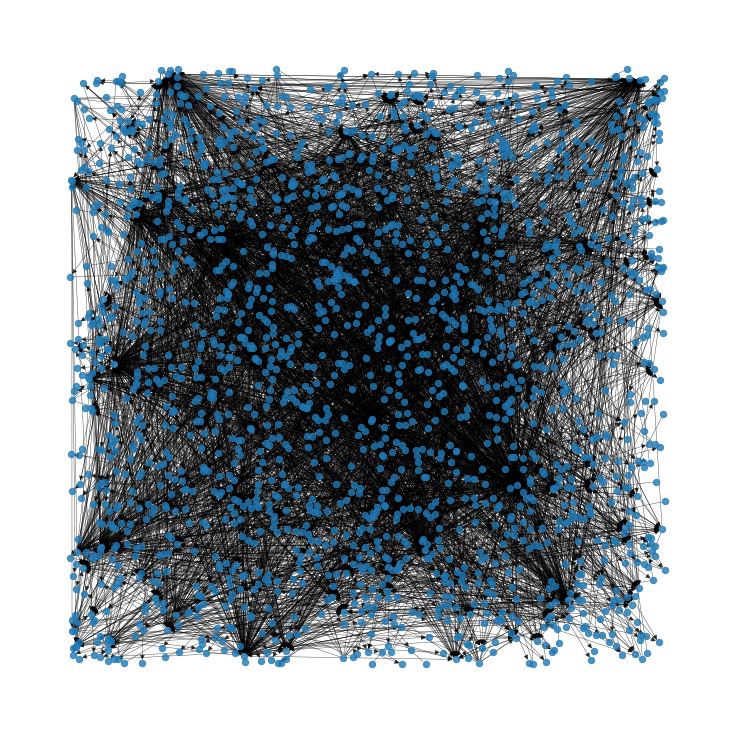

In [115]:
# plot graph
plt.figure(figsize=(10,10))

# positions all the nodes of G_train in uniform random manner over the plot
pos = nx.random_layout(G_train)
nx.draw(G_train, with_labels=False,  pos = pos, node_size = 40, alpha = 0.8, width = 0.4)

plt.show()

In [132]:
eig_centr = nx.eigenvector_centrality_numpy(G_train, weight="value")
print(list(eig_centr.items())[:10], len(eig_centr))

[('0', 0.002522088470600226), ('101', 6.813899324255198e-05), ('102', 8.114534429709902e-05), ('107', 7.917975906894807e-05), ('1075', 2.6894920292541023e-06), ('108', 1.1069045370271425e-05), ('1090', 1.1623864107811096e-06), ('1123', 7.257477442063511e-05), ('112692', 2.0402909633070597e-06), ('1138', 1.9024175853231045e-05)] 1917


In [133]:
pagerank = nx.pagerank(G_train, weight="value")
print(list(pagerank.items())[:2], len(pagerank))

[('0', 0.022984771764200166), ('101', 0.000957097995655579)] 1917


In [134]:
closeness_centrality = nx.pagerank(G_train, weight="value")
print(list(closeness_centrality.items())[:2], len(closeness_centrality))

[('0', 0.022984771764200166), ('101', 0.000957097995655579)] 1917


In [131]:
bet_centrality = nx.betweenness_centrality(G_train, weight="value")
print(list(bet_centrality.items())[:2], len(bet_centrality))

[('0', 0.09280212801909984), ('101', 0.017431877769722607)] 1917


In [139]:
test = "Hi"
print(str(test))

Hi


In [236]:
# we create a balanced dataset with equal labels 0 and 1
train_data_bal = train_data.copy()

In [237]:
while len(train_data_bal) <= 2*len(train_data):
    rand_couple = random.sample(list(all_wallets), 2)
    if rand_couple in G_train.edges:
        pass
    else:
        new_row = pd.DataFrame({'Source': rand_couple[0], 'Target': rand_couple[1], 'value': 0, 'nb_transactions': 0}, index=[len(train_data_bal)])
        train_data_bal = pd.concat([train_data_bal, new_row])
print( train_data_bal.tail() )

         Source    Target  value  nb_transactions
10310         4   1678539      0                0
10311  70796582     50320      0                0
10312      2480  72707854      0                0
10313  70112833       219      0                0
10314      1309      7787      0                0


In [240]:
# here, column can either be "Source" or "Target" as strings, feature_dict is one of the four 
# dictionaries that hold feature value for every wallet. 
# name is the name of this new column, a string
train_data_exp = train_data_bal.copy()
def add_feature_column(column,feature_dict, name):
    feature_column = []
    for wallet in train_data_exp[column]:
        feature_column.append( feature_dict[wallet] )
    train_data_exp[name] = feature_column

In [242]:
add_feature_column("Source", pagerank, "src_pagerank")
add_feature_column("Source", eig_centr, "src_eig_centr")
add_feature_column("Source", closeness_centrality, "src_closeness_centrality")
add_feature_column("Source", bet_centrality, "src_bet_centrality")

add_feature_column("Target", pagerank, "trgt_pagerank")
add_feature_column("Target", eig_centr, "trgt_eig_centr")
add_feature_column("Target", closeness_centrality, "trgt_closeness_centrality")
add_feature_column("Target", bet_centrality, "trgt_bet_centrality")



In [243]:
train_data_exp.tail()

,Source,Target,value,nb_transactions,src_pagerank,src_eig_centr,src_closeness_centrality,src_bet_centrality,trgt_pagerank,trgt_eig_centr,trgt_closeness_centrality,trgt_bet_centrality
10310,4,1678539,0,0,0.006572,5.726541e-04,0.006572,0.009456,0.000209,6.106104e-18,0.000209,0.000000
10311,70796582,50320,0,0,0.000209,1.692347e-18,0.000209,0.000000,0.000387,5.508433e-18,0.000387,0.000000
10312,2480,72707854,0,0,0.000234,2.883583e-05,0.000234,0.000000,0.000210,5.558238e-07,0.000210,0.000000
10313,70112833,219,0,0,0.000209,1.463423e-18,0.000209,0.000000,0.000425,-1.919141e-18,0.000425,0.000242
10314,1309,7787,0,0,0.000212,1.090009e-09,0.000212,0.000000,0.000213,2.541714e-06,0.000213,0.000000


In [248]:
flattened = list( train_data_exp["nb_transactions"] )
for i,e in enumerate( flattened ):
    if e != 0:
        flattened[i] = 1
train_data_exp["nb_transactions"] = flattened
print(train_data_exp.head())

  Source Target       value  nb_transactions  src_pagerank  src_eig_centr  \
0      0    101    71987001                1      0.022985       0.002522   
1      0    102    19231410                1      0.022985       0.002522   
2      0    107  3825066922                1      0.022985       0.002522   
3      0   1075     2955400                1      0.022985       0.002522   
4      0    108   489695841                1      0.022985       0.002522   

   src_closeness_centrality  src_bet_centrality  trgt_pagerank  \
0                  0.022985            0.092802       0.000957   
1                  0.022985            0.092802       0.001004   
2                  0.022985            0.092802       0.002866   
3                  0.022985            0.092802       0.002663   
4                  0.022985            0.092802       0.000976   

   trgt_eig_centr  trgt_closeness_centrality  trgt_bet_centrality  
0        0.000068                   0.000957             0.017432  
1   

In [250]:
# this is the final dataframe, balanced with equal labels, expanded with our graph features,
# then flattened to either 0 or 1 for nr transactions, 
# then remove value column because it is not used. We apply ML on this

final_dataset = train_data_exp.drop(columns=['value'])
print(final_dataset.head())
final_dataset.to_pickle("./final_dataset.pkl")  



  Source Target  nb_transactions  src_pagerank  src_eig_centr  \
0      0    101                1      0.022985       0.002522   
1      0    102                1      0.022985       0.002522   
2      0    107                1      0.022985       0.002522   
3      0   1075                1      0.022985       0.002522   
4      0    108                1      0.022985       0.002522   

   src_closeness_centrality  src_bet_centrality  trgt_pagerank  \
0                  0.022985            0.092802       0.000957   
1                  0.022985            0.092802       0.001004   
2                  0.022985            0.092802       0.002866   
3                  0.022985            0.092802       0.002663   
4                  0.022985            0.092802       0.000976   

   trgt_eig_centr  trgt_closeness_centrality  trgt_bet_centrality  
0        0.000068                   0.000957             0.017432  
1        0.000081                   0.001004             0.005019  
2       

In [255]:
X = final_dataset[['src_pagerank','src_eig_centr','src_closeness_centrality',
        'src_bet_centrality','trgt_pagerank','trgt_eig_centr','trgt_closeness_centrality','trgt_bet_centrality']]
y = final_dataset['nb_transactions']

In [256]:
#split our dataset into 80/20 training/testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# train the lightgbm model
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

LGBMClassifier()

In [258]:
#compute the accuracy of the results
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_pred, y_test)
print('accuracy of this model is: ', accuracy_score(y_test, y_pred))


accuracy of this model is:  0.9015996122152206


In [259]:
file_model = open('model.pkl', 'wb')
pickle.dump(model,file_model)
file_model.close()